In [5]:
import numpy as np 
import matplotlib.pyplot as plt

In [6]:
def relu(X):
	return np.maximum(X, 0)

def d_relu(X):
	return 1. * (X > 0)

def sigmoid(X):
    return 1 / (1 + np.exp(-X))

def d_sigmoid(X):
    return sigmoid(X) * (1 - sigmoid(X))


class MultiLayerPerceptron():
     
    def __init__(self, input_size, hidden_size, output_size):
        self.input_size = input_size
        self.hidden_size = hidden_size
        self.output_size = output_size
        self.weights1 = np.random.rand(input_size, hidden_size)
        self.bias1 = np.random.rand(hidden_size)
        self.weights2 = np.random.rand(hidden_size, hidden_size)
        self.bias2 = np.random.rand(hidden_size)
        self.weights3 = np.random.rand(hidden_size, output_size)
        self.bias3 = np.random.rand(output_size)
        self.learning_rate = 0.01

    def forward(self, X):
        self.X = X
        self.Z1 = np.dot(X, self.weights1) + self.bias1
        self.A1 = sigmoid(self.Z1)
        self.Z2 = np.dot(self.A1, self.weights2) + self.bias2
        self.A2 = sigmoid(self.Z2)
        self.Z3 = np.dot(self.A2, self.weights3) + self.bias3
        self.A3 = sigmoid(self.Z3)
        return self.A3

    def backward(self, dA):
        dZ3 = dA * d_sigmoid(self.Z3)
        dW3 = np.dot(self.A2.T, dZ3)
        db3 = np.sum(dZ3, axis=0)
        dA2 = np.dot(dZ3, self.weights3.T)
        dZ2 = dA2 * d_sigmoid(self.Z2)
        dW2 = np.dot(self.A1.T, dZ2)
        db2 = np.sum(dZ2, axis=0)
        dA1 = np.dot(dZ2, self.weights2.T)
        dZ1 = dA1 * d_sigmoid(self.Z1)
        dW1 = np.dot(self.X.T, dZ1)
        db1 = np.sum(dZ1, axis=0)
        self.weights3 -= self.learning_rate * dW3
        self.bias3 -= self.learning_rate * db3
        self.weights2 -= self.learning_rate * dW2
        self.bias2 -= self.learning_rate * db2
        self.weights1 -= self.learning_rate * dW1
        self.bias1 -= self.learning_rate * db1
        return dA1


    def train(self, X, y, epochs):
        self.loss = []
        for i in range(epochs):
            A = self.forward(X)
            loss = np.sum((A - y) ** 2)
            dA = 2 * (A - y)
            self.backward(dA)
            self.loss.append(loss)



In [7]:
X = np.random.rand(500, 2)
y = np.zeros((500, 1))

# Make the classication problem a bit harder
y[X[:, 0] > 0.5] = 1
y[X[:, 1] > 0.5] = 1 

In [8]:
model = MultiLayerPerceptron(2, 8, 1)
model.train(X, y, 15000)

[]

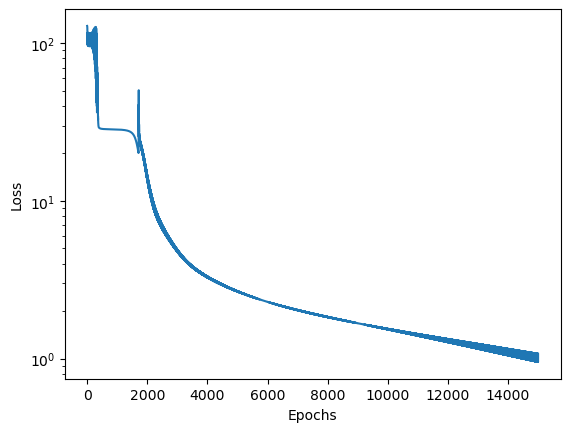

In [9]:
plt.plot(model.loss)
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.semilogy()

In [10]:
# Plot the decision boundary
xx = np.linspace(0, 1, 500)
yy = np.linspace(0, 1, 500)
XX, YY = np.meshgrid(xx, yy)
ZZ = np.zeros(XX.shape)
for i in range(XX.shape[0]):
    for j in range(XX.shape[1]):
        ZZ[i, j] = model.forward(np.array([[XX[i, j], YY[i, j]]]))

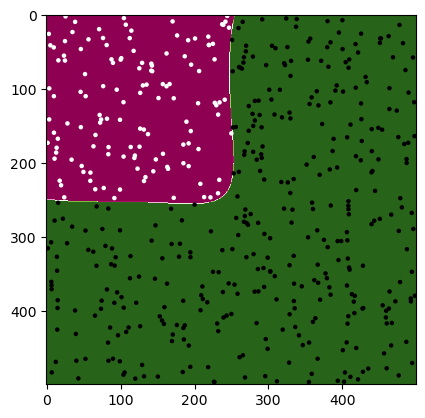

In [11]:
fig, ax = plt.subplots()
ax.imshow(ZZ>0.5, cmap='PiYG')
ax.scatter(500* X[:, 0], 500 * X[:, 1], c=y[:, 0], cmap='bone_r', s=5)